In [18]:
# Packages
import pandas as pd
import os 
from datetime import datetime


# Set working directory
os.chdir("/accounts/gen/guest/ppori34/Dartmouth/Red_Sox")

In [19]:
# Read data
red_2009 = pd.read_csv('red_sox_2009.csv', encoding='GBK')
red_2010 = pd.read_csv('red_sox_2010.csv', encoding='GBK')
red_2011 = pd.read_csv('red_sox_2011.csv', encoding='GBK')
red_2012 = pd.read_csv('red_sox_2012.csv', encoding='GBK')

# Add a year column based on the file's year
red_2009['year'] = 2009
red_2010['year'] = 2010
red_2011['year'] = 2011
red_2012['year'] = 2012

# Define a function to parse and convert the date with varying years
def parse_date(row):
    date_str = row['gamedate']
    year = row['year']
    return datetime.strptime(f"{date_str} {year}", "%b %d %Y").strftime("%Y-%m-%d")

def convert_date(row):
    date_str = row['transaction_date']
    year = row['year']
    formatted_date = datetime.strptime(f"{date_str.replace('_', '/')} {year}", "%m/%d %Y")
    return formatted_date.strftime("%Y-%m-%d")


# Apply the function to each DataFrame
red_2009['gamedate'] = red_2009.apply(parse_date, axis=1)
red_2009['transaction_date'] = red_2009.apply(convert_date, axis=1)
red_2010['gamedate'] = red_2010.apply(parse_date, axis=1)
red_2010['transaction_date'] = red_2010.apply(convert_date, axis=1)
red_2011['gamedate'] = red_2011.apply(parse_date, axis=1)
red_2011['transaction_date'] = red_2011.apply(convert_date, axis=1)
red_2012['gamedate'] = red_2012.apply(parse_date, axis=1)
red_2012['transaction_date'] = red_2012.apply(convert_date, axis=1)

# Concatenate the data
df_red = pd.concat([red_2009, red_2010, red_2011, red_2012])
df_red = df_red.sort_values('days_from_transaction_until_game', ascending=False)

# Drop the 'year' column (if no longer needed)
# df_red = df_red.drop(columns=['year'])
df_red

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
914,2009-02-01,IFGS,62.0,2,OCT,CLE,1.0,1.0,2009-10-04,4.127134,251,2009
902,2009-02-01,IFGS,87.0,2,OCT,CLE,1.0,1.0,2009-10-04,4.465908,251,2009
967,2009-02-01,LowerBleachers,45.0,2,OCT,CLE,1.0,1.0,2009-10-04,3.806663,251,2009
970,2009-02-01,FamilyGS,65.0,2,OCT,CLE,1.0,1.0,2009-10-04,4.174387,251,2009
1047,2009-02-01,LowerBleachers,44.0,2,OCT,CLE,1.0,1.0,2009-10-04,3.784190,251,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16599,2010-08-02,LowerBleachers,28.0,8,AUG,CLE,0.0,0.0,2010-08-02,3.332205,0,2010
43491,2012-04-30,IFGS,29.0,2,APR,OAK,0.0,0.0,2012-04-30,3.367296,0,2012
140136,2011-09-14,LowerBleachers,9.5,4,SEP,TOR,1.0,0.0,2011-09-14,2.251292,0,2011
79322,2011-08-07,UpperBleachers,90.0,2,AUG,NYY,0.0,1.0,2011-08-07,4.499810,0,2011


In [20]:
# Rename the colume names
df_red = df_red.rename(columns={'transaction_date': 'transactiondate'})
df_red = df_red.rename(columns={'sectiontype': 'type'})
df_red = df_red.rename(columns={'price_per_ticket': 'price'})
df_red = df_red.rename(columns={'number_of_tickets': 'nof_tickets'})
df_red = df_red.rename(columns={'gamemonth': 'month'})
df_red = df_red.rename(columns={'day_game': 'day'})
df_red = df_red.rename(columns={'weekend_game': 'weekend'})
df_red = df_red.rename(columns={'days_from_transaction_until_game': 'days_transaction'})

In [21]:
month_mapping = {'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10,}
df_red['month'] = df_red['month'].map(month_mapping)

In [22]:
# Sample Size
print(f'Number of Sample Size:',len(df_red))

# Number of missing values
print(f'Number of Missing Values for each Column:',"\n",df_red.isna().sum())

Number of Sample Size: 453171
Number of Missing Values for each Column: 
 transactiondate       0
type                  0
price                 0
nof_tickets           0
month                 0
team                  0
day                 235
weekend             235
gamedate              0
logprice              0
days_transaction      0
year                  0
dtype: int64


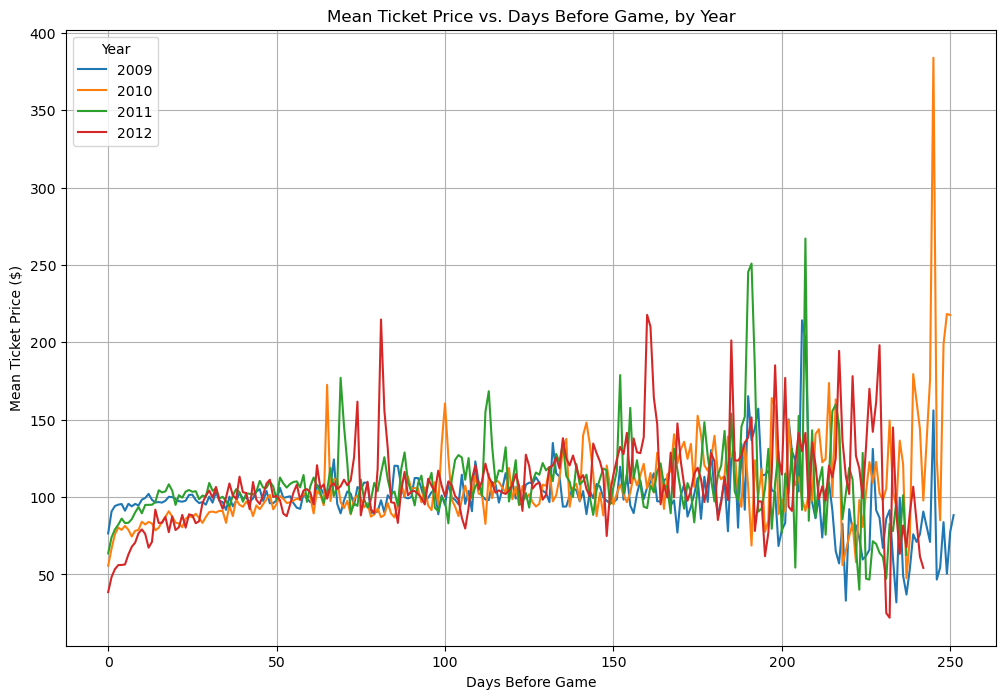

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
data = df_red.copy()
missing_values = data.isnull().sum()

# Remove rows with missing values in 'day' and 'weekend' for consistency
data_cleaned = data.dropna(subset=['day', 'weekend'])

# Aggregate mean price by 'days_transaction' and 'year'
price_trends = data_cleaned.groupby(['days_transaction', 'year']).agg(
    mean_price=('price', 'mean')
).reset_index()

# Plot the trends
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=price_trends, 
    x='days_transaction', 
    y='mean_price', 
    hue='year', 
    palette='tab10'
)
plt.title("Mean Ticket Price vs. Days Before Game, by Year")
plt.xlabel("Days Before Game")
plt.ylabel("Mean Ticket Price ($)")
plt.legend(title="Year")
plt.grid(True)
plt.show()

The plot above illustrates how the average ticket price varies as the number of days before the game decreases, with separate lines for each year. This allows us to observe how ticket pricing dynamics change over time and across years.

## Observations:
The trends show how prices for the tickets generally fluctuate or increase as the game date approaches.
Differences in pricing patterns between years are evident, indicating changes in consumer behavior or market dynamics.

3. Key Observations from Summary Statistics

- By Time Interval:
Prices tend to be highest 31+ days before the game: This may reflect early bird pricing or higher demand for premium tickets purchased well in advance.
Prices drop slightly in the 15-30 day range and then climb again in the last week (0-7 days). The last-minute increase suggests urgency-driven demand.

- By Year:
The mean ticket price shows variability across years, influenced by external factors like team performance, season popularity, or economic conditions.
The standard deviation of prices indicates greater variability closer to the game date, possibly due to demand surges or variable inventory availability.

## 4. Visualization of Key Trends
Would you like visualizations for these trends, such as:

    1. Heatmaps of prices by year and interval.

    2. Year-over-year comparison of mean prices?

/tmp/ipykernel_425656/577233612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['time_interval'] = pd.cut(data_cleaned['days_transaction'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_425656/577233612.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_summary = data_cleaned.groupby(['year', 'time_interval']).agg(
/tmp/ipykernel_425656/577233612.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

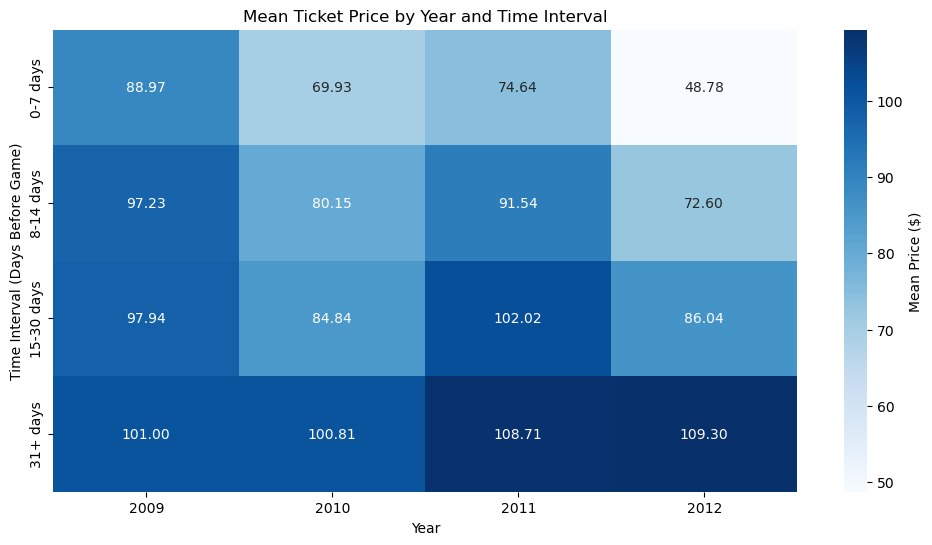

In [24]:
# Recreate the interval_summary from previously cleaned data
bins = [0, 7, 14, 30, data_cleaned['days_transaction'].max()]
labels = ['0-7 days', '8-14 days', '15-30 days', '31+ days']
data_cleaned['time_interval'] = pd.cut(data_cleaned['days_transaction'], bins=bins, labels=labels, right=False)

# Group by year and time interval to calculate summary statistics
interval_summary = data_cleaned.groupby(['year', 'time_interval']).agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    std_price=('price', 'std'),
    mean_logprice=('logprice', 'mean'),
    count=('price', 'count')
).reset_index()
interval_summary = interval_summary.groupby(['year', 'time_interval'], as_index=False).mean()

# Recreate and display the heatmap, boxplot, and line plot as before
# Heatmap of mean prices by year and time interval
heatmap_data = interval_summary.pivot(index='time_interval', columns='year', values='mean_price')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Mean Price ($)'})
plt.title("Mean Ticket Price by Year and Time Interval")
plt.ylabel("Time Interval (Days Before Game)")
plt.xlabel("Year")
plt.show()

Heatmap of Mean Ticket Prices by Year and Time Interval:

- Highlights differences in average prices across years and time intervals.
- Useful for identifying trends in early vs. late ticket purchases.

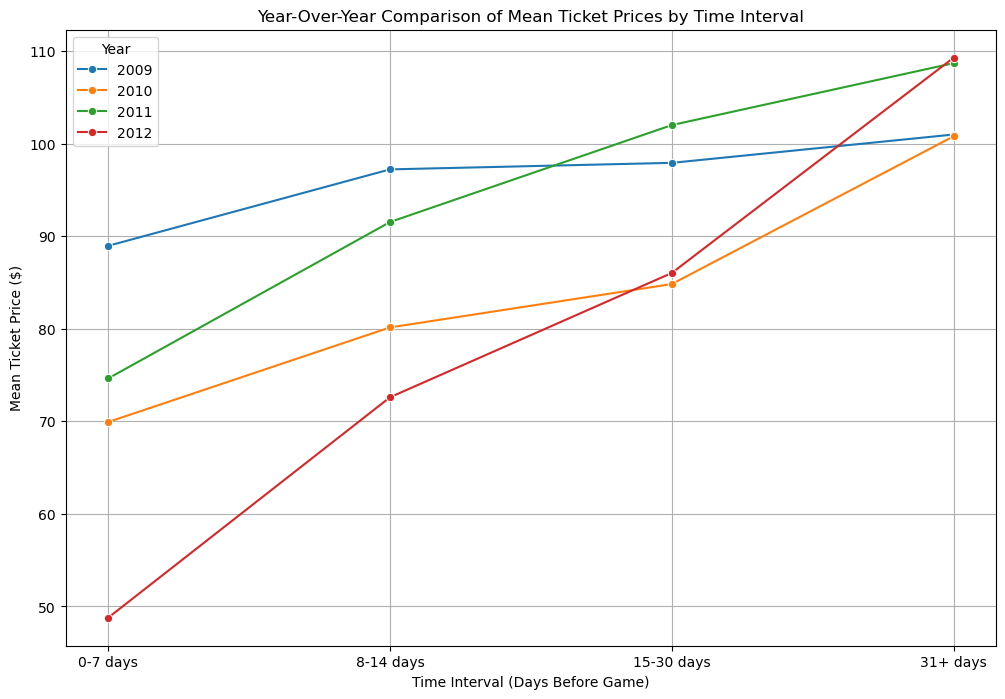

In [25]:
# Line plot of year-over-year comparison of mean prices
plt.figure(figsize=(12, 8))
sns.lineplot(data=interval_summary, x='time_interval', y='mean_price', hue='year', marker='o', palette='tab10')
plt.title("Year-Over-Year Comparison of Mean Ticket Prices by Time Interval")
plt.ylabel("Mean Ticket Price ($)")
plt.xlabel("Time Interval (Days Before Game)")
plt.legend(title="Year")
plt.grid(True)
plt.show()

Line Plot of Year-Over-Year Comparison of Mean Prices:

- Illustrates how mean prices evolve across time intervals for each year.
- Highlights distinct pricing patterns across years and their alignment with the time before the game.